In [421]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
import os
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [422]:
def face_detection(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cascade_image = cv2.CascadeClassifier('FaceDetHaarXML/haarcascade_frontalface_alt.xml')
    faces = cascade_image.detectMultiScale(image, scaleFactor = 1.3, minNeighbors = 5)
    if (len(faces) == 0):
        return None, None
    (x, y, l, b) = faces[0]
    return image[y:y+b, x:x+l], faces[0]
def face_detection1(image):
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cascade_image = cv2.CascadeClassifier('FaceDetHaarXML/haarcascade_frontalface_alt.xml')
    faces = cascade_image.detectMultiScale(image, scaleFactor = 1.3, minNeighbors = 5)
    if (len(faces) == 0):
        return None, None
    (x, y, l, b) = faces[0]
    return image[y:y+b, x:x+l], faces[0]

In [423]:
def loadDataLabels(data_path):
    faces = []
    labels = []
    enc_labels = []
#     c = 0
    directories = os.listdir(data_path)
    for i, direc in enumerate(directories):
        sub_dir_path = data_path + "/" + direc
        sub_dir_images = os.listdir(sub_dir_path)
        label = direc
        for j, image_name in enumerate(sub_dir_images):
            image_path = sub_dir_path + "/" + image_name
            img = cv2.imread(image_path)
#             image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            face_detected, shape = face_detection(img)
            if face_detected is not None:
                face_detected = cv2.resize(face_detected, (256, 256))
                faces.append(face_detected)
                labels.append(label)
#                 enc_labels.appen(c)
#             if image is not None:
#                 image = cv2.resize(image, (256, 256))
#                 faces.append(image)
#                 labels.append(label)
    labels = np.array(labels)
    label_encoder = preprocessing.LabelEncoder() 
    enc_labels = label_encoder.fit_transform(labels) 
    faces = np.array(faces)
    return faces, labels, enc_labels
# def loadDataLabels(data_path):
#     faces = cv2.imread("./Dataset/Aadhithya/Aadhit_CI_01.jpg")
#     labels = 'Aadhithya'
#     directories = os.listdir(data_path)
#     for i, direc in enumerate(directories):
#         sub_dir_path = data_path + "/" + direc
#         sub_dir_images = os.listdir(sub_dir_path)
#         label = direc
#         for j, image_name in enumerate(sub_dir_images):
#             image_path = sub_dir_path + "/" + image_name
#             img = cv2.imread(image_path)
#             image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# #             face_detected, shape = detect_face(image)
#             if image is not None:
#                 image = cv2.resize(image, (256, 256))
# #                 faces.append(image)
# #                 labels.append(label)
#                 faces = np.hstack((faces, image))
#                 labels = np.hstack((labels, label))
#     labels = np.array(labels)
#     enc_labels = list(range(0, len(labels)))
#     enc_labels = np.array(enc_labels)
#     faces = np.array(faces)
#     return faces, labels, enc_labels

In [424]:
faces, labels, enc_labels = loadDataLabels("./Dataset")

600
600
600
Deepika


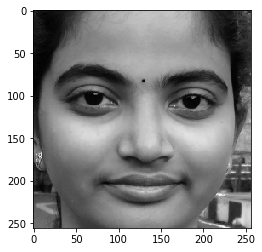

(600,)


In [425]:
print(len(faces))
print(len(labels))
print(len(enc_labels))
print(labels[100])
plt.imshow(faces[100], cmap = 'gray')
plt.show()
print(labels.shape)

In [426]:
def DisplayImages(img_list):
    plt.figure(figsize = (10, 11))
    for i in range(len(img_list)):
        plt.subplot((len(img_list)+1)//4, 4, i+1)
        #img_list[i] = cv2.cvtColor(img_list[i], cv2.COLOR_BGR2RGB)
        cmap = None
        if len(img_list[i].shape) == 2:
            cmap = 'gray'
        else:
            cmap = cmap
        plt.imshow(img_list[i], cmap = cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad = 0, h_pad = 0, w_pad = 0)
    plt.show()

# DisplayImages(faces)
# plt.imshow(faces[139])

In [427]:
face_recPCA = cv2.face.EigenFaceRecognizer_create()

face_recLDA = cv2.face.FisherFaceRecognizer_create()

face_recLBP = cv2.face.LBPHFaceRecognizer_create()

In [428]:
(X_train, X_test, y_train, y_test) = train_test_split(faces, enc_labels, test_size=0.25, random_state=42)

In [429]:
# face_recPCA.train(X_train, y_train)

In [430]:
# face_recLDA.train(X_train, y_train)

In [431]:
face_recLBP.train(X_train, y_train)

In [432]:
le = preprocessing.LabelEncoder() 
le.fit_transform(lab) 
labels_unique = le.classes_
labels_unique

array(['Aadhithya', 'Abhijith', 'Abhiramon', 'Aditya', 'Akhila', 'Anagha',
       'Anshuk', 'Deepika', 'Deepti', 'Devyani', 'Harsha_3rd_year',
       'Harsha_5th_year', 'Hatim', 'Himank', 'Juhi', 'Karthik', 'Mahesh',
       'Naman', 'Nehal', 'Palash', 'Prachi', 'Pragya', 'Pranav',
       'Pranith', 'Rachit', 'Rakshith', 'Ravi', 'Rohil', 'Shabaz',
       'Shashikant', 'Shiloni', 'Shivang', 'Sowmya', 'Sravya', 'Tripti',
       'Utkarsh', 'Vaibhav', 'Vamsi', 'Vishnu', 'Vivek'], dtype='<U15')

In [433]:
def draw_shapeAndText(image, shape, text, pos1, pos2):
    (x, y, l, b) = shape
    cv2.rectangle(image, (x, y), (x+l, y+b), (0, 255, 0), 3)
    cv2.putText(image, text, (pos1, pos2), (0, 255, 0), 3)

In [434]:
def prediction(image):
    face, shape = face_detection1(image)
#     label, par = face_recPCA.predict(image)
#     label, par = face_recLDA.predict(image)
    label, par = face_recLBP.predict(image)
    text = labels_unique[label]
#     draw_shapeAndText(image, shape, text, shape[0], shape[1]-5)
    return image, text

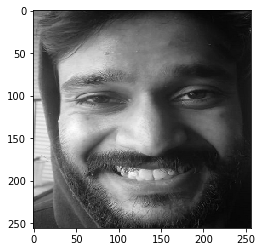

Himank
Himank


In [435]:
out_img, label = prediction(X_test[18])
plt.imshow(out_img, cmap = 'gray')
plt.show()
print(label)
print(labels_unique[y_test[18]])
# print(y_test[52])

In [447]:
# img, label = prediction(faces[400])
# print(label)
# (X_train, X_test, y_train, y_test) = train_test_split(faces, enc_labels, test_size=0.25, random_state=42)
# predictionsPCA = []
# predictionsLDA = []
predictionsLBP = []
for img in X_test:
#     predictionsPCA.append(face_recPCA.predict(img))
#     predictionsLDA.append(face_recLDA.predict(img))
    predictionsLBP.append(face_recLBP.predict(img))

In [448]:
# # print((predictionsPCA[0][0]))
# # print((y_test.dtype))
# c1 = 0
# for i in range(len(y_test)):
#     if (predictionsPCA[i][0] == y_test[i]):
#         c1 = c1 + 1
# # print(c)
# # print(c/len(y_test))
# print("PCA Accuracy: ", (c1/len(y_test))*100)            #PCA Accuracy:  65.33333333333333

In [449]:
# # print((predictionsPCA[0][0]))
# # print((y_test.dtype))
# c2 = 0
# for i in range(len(y_test)):
#     if (predictionsLDA[i][0] == y_test[i]):
#         c2 = c2 + 1
# # print(c)
# # print(c/len(y_test))
# print("LDA Accuracy: ", (c2/len(y_test))*100)             #LDA Accuracy:  63.33333333333333

In [450]:
# print(len(predictionsLBP))
# print(len(y_test))
c3 = 0
for i in range(len(y_test)):
    if (predictionsLBP[i][0] == y_test[i]):
        c3 = c3 + 1
# print(c)
# print(c/len(y_test))
print("LBP Accuracy: ", (c3/len(y_test))*100)             #LBP Accuracy:  88.0

150
150
LBP Accuracy:  88.0


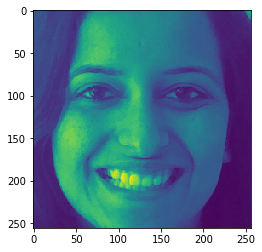

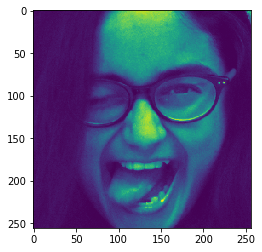

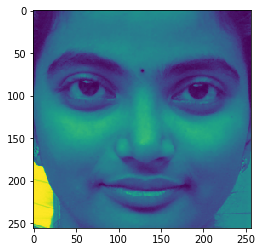

In [440]:
plt.imshow(faces[110])
plt.show()
plt.imshow(X_train[110])
plt.show()
plt.imshow(X_test[100])
plt.show()
# len(X_test)